<a href="https://colab.research.google.com/github/naskar002/Machine-Learning-Projects/blob/main/Anaemia_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Dataset link***: [https://www.kaggle.com/datasets/humairmunir/anaemia-prediction](https://www.kaggle.com/datasets/humairmunir/anaemia-prediction)

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/content/output.csv')
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [5]:
df_copy = df.copy()

In [6]:
df.shape

(104, 7)

In [7]:
df.tail()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No
103,104,F,43.5706,29.8094,26.6199,12.2,No


In [8]:
df.columns

Index(['Number', 'Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb',
       'Anaemic'],
      dtype='object')

In [9]:
df.drop('Number',axis=1,inplace=True)

In [10]:
df.head()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,M,43.2555,30.8421,25.9025,6.3,Yes
1,F,45.6033,28.1900,26.2067,13.5,No
2,F,45.0107,28.9677,26.0215,11.7,No
3,F,44.5398,28.9899,26.4703,13.5,No
4,M,43.2870,30.6972,26.0158,12.4,No


In [11]:
df['Sex'] = np.where(df['Sex'].str.contains('M'),1,0)

In [12]:
df.head()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,43.2555,30.8421,25.9025,6.3,Yes
1,0,45.6033,28.1900,26.2067,13.5,No
2,0,45.0107,28.9677,26.0215,11.7,No
3,0,44.5398,28.9899,26.4703,13.5,No
4,1,43.2870,30.6972,26.0158,12.4,No


In [13]:
df['Sex'].value_counts()

Sex
1    55
0    49
Name: count, dtype: int64

In [14]:
feature_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>0]

In [15]:
feature_with_nan

[]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           104 non-null    int64  
 1   %Red Pixel    104 non-null    float64
 2   %Green pixel  104 non-null    float64
 3   %Blue pixel   104 non-null    float64
 4   Hb            104 non-null    float64
 5   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.0+ KB


In [17]:
df['Anaemic'] = np.where(df['Anaemic'].str.contains('Yes'),1,0)

In [18]:
df.head()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,43.2555,30.8421,25.9025,6.3,1
1,0,45.6033,28.1900,26.2067,13.5,0
2,0,45.0107,28.9677,26.0215,11.7,0
3,0,44.5398,28.9899,26.4703,13.5,0
4,1,43.2870,30.6972,26.0158,12.4,0


In [19]:
df['Anaemic'].value_counts()

Anaemic
0    78
1    26
Name: count, dtype: int64

# Distribution of all features

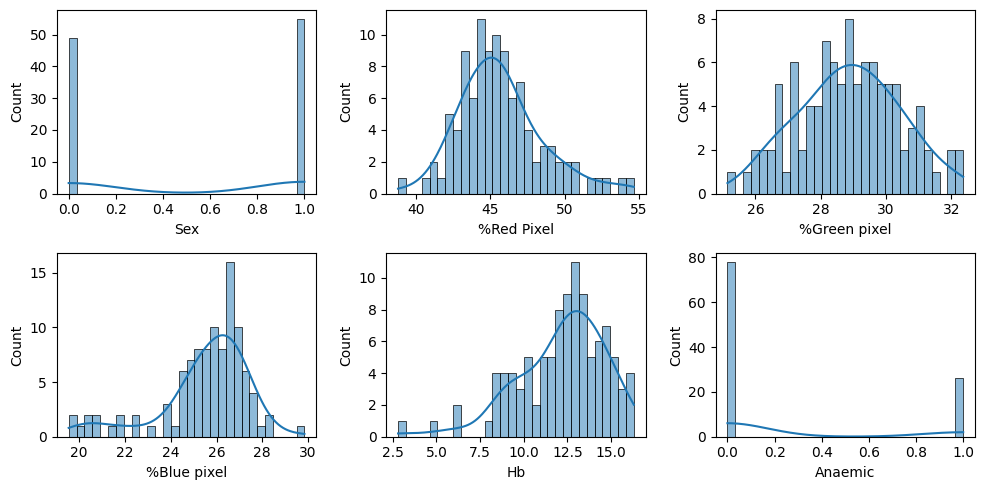

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
col,row = 3,2
fig,axes = plt.subplots(row,col,figsize=(10,5))
for i,ft in enumerate(df.columns):
  sns.histplot(x=ft,data=df,ax=axes[i//col,i%col],bins=30,kde=True)
plt.tight_layout()

 Most of the feature has normal distribution

<Axes: >

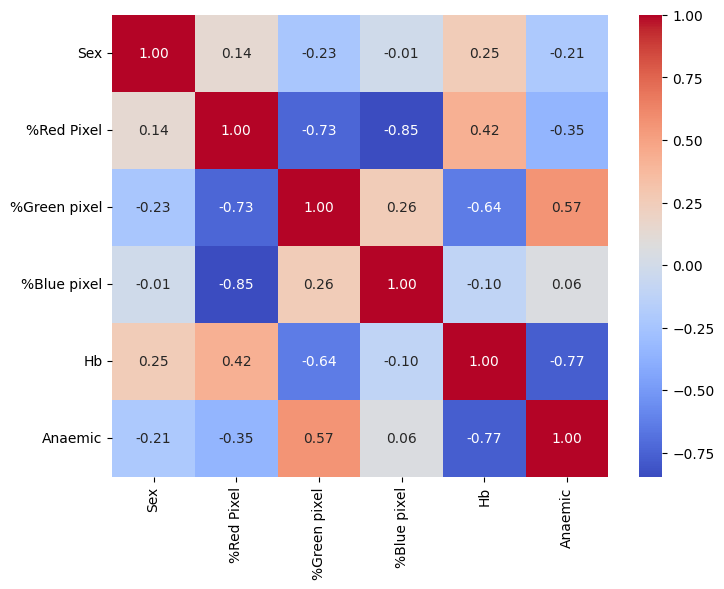

In [21]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')

Features are not highly correlated

In [22]:
X = df.drop('Anaemic',axis=1)
y = df['Anaemic']

In [23]:
# convert it to numpy array
X = np.asarray(X)
y = np.asarray(y)

## Model Selection

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [25]:
models = [LogisticRegression(max_iter=1000),SVC(),RandomForestClassifier(),KNeighborsClassifier()]


In [43]:
model_parameters = {
    'log_reg_hyperparams':{
        'C':[0.1,1,5,10,100],
        'penalty':['l1','l2']
    },
    'svc_hyperparams':{
        'C':[0.1,1,5,10,100],
        'kernel':['rbf','linear','poly','sigmoid'],
        'gamma':['scale','auto']

    },
    'rf_hyperparams':{
        'n_estimators':[10,50,100,200]
    },
    'knn_hyperparams':{
        'n_neighbors':[3,5,7,9,11],
        'weights':['uniform','distance']
    }
}

In [44]:
model_key  = list(model_parameters.keys())
model_key

['log_reg_hyperparams', 'svc_hyperparams', 'rf_hyperparams', 'knn_hyperparams']

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [46]:
def model_selection(list_of_models, X, y, model_parameters):
    result = []
    i = 0
    for model in list_of_models:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])

        # Retrieve the corresponding parameters for the current model
        key = list(model_parameters.keys())[i]
        params = model_parameters[key]

        # Modify parameter names for GridSearchCV
        params = {'model__' + k: v for k, v in params.items()}  # Add 'model__' prefix
        i += 1

        # Perform GridSearchCV
        clf = GridSearchCV(pipe, param_grid=params, cv=5)
        clf.fit(X, y)

        # Store results
        result.append({
            'model': model,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_
        })

    return pd.DataFrame(result)

In [47]:
best_model = model_selection(models,X,y,model_parameters)
best_model

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

,model,best_score,best_params
0,LogisticRegression(max_iter=1000),0.960952,"{'model__C': 1, 'model__penalty': 'l2'}"
1,SVC(),0.980476,"{'model__C': 10, 'model__gamma': 'scale', 'mod..."
2,RandomForestClassifier(),0.970476,{'model__n_estimators': 10}
3,KNeighborsClassifier(),0.951429,"{'model__n_neighbors': 7, 'model__weights': 'u..."


So for this dataset svc model of degree 2 gives the highest accuracy

In [48]:
best_model.sort_values('best_score',ascending=False,inplace=True)

In [49]:
best_model.reset_index(drop=True,inplace=True)

In [50]:
best_model.head()

,model,best_score,best_params
0,SVC(),0.980476,"{'model__C': 10, 'model__gamma': 'scale', 'mod..."
1,RandomForestClassifier(),0.970476,{'model__n_estimators': 10}
2,LogisticRegression(max_iter=1000),0.960952,"{'model__C': 1, 'model__penalty': 'l2'}"
3,KNeighborsClassifier(),0.951429,"{'model__n_neighbors': 7, 'model__weights': 'u..."


In [51]:
best_paramaters = best_model['best_params'][0]
best_paramaters

{'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'linear'}

In [56]:
prediction_model = SVC(C=10,kernel='linear',gamma='scale')
prediction_model.fit(X,y)

SVC(C=10, kernel='linear')

### Building a predictive system for the model

In [61]:
input_data = ['M',45.0484,31.1049,23.8467,9]
input_data = [1 if str(i).upper() == 'M' else 0 if str(i).upper() == 'F' else i for i in input_data]
input_data = np.asarray(input_data)
input_data_reshaped = input_data.reshape(1,-1)
output = prediction_model.predict(input_data_reshaped)
if output[0]==1:
  print('Anaemic')
else:
  print('Not Anaemic')

Anaemic
